# Detecção de Fraude em Cartões de Crédito

#Introdução:

A fraude em transações com cartões de crédito é um problema que afeta consumidores, empresas e instituições financeiras em todo o mundo. Transações fraudulentas podem resultar em grandes prejuízos financeiros e impactar a confiança dos clientes no uso de cartões de crédito. Por isso, é fundamental desenvolver métodos eficazes de detecção de fraudes para proteger as transações e os usuários.

Neste projeto, abordaremos a problemática da detecção de fraudes em transações de cartões de crédito utilizando técnicas de análise de dados e machine learning. Nosso objetivo é explorar a relevância do uso de dados nesse contexto e desenvolver um modelo que seja capaz de identificar transações fraudulentas com alta precisão.


# Coleta de Dados
Utilizaremos um conjunto de dados de transações de cartões de crédito disponibilizado pela ULB (Université Libre de Bruxelles). O conjunto de dados contém informações sobre transações legítimas e fraudulentas e será utilizado para treinar e avaliar nosso modelo de detecção de fraudes.

Fonte dos dados: [Credit Card Fraud Detection ](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


#Contexto:

A fraude em transações de cartões de crédito é um desafio constante para instituições financeiras e empresas que processam pagamentos eletrônicos. Os fraudadores estão sempre buscando novas maneiras de contornar os sistemas de segurança e realizar transações fraudulentas. Portanto, é essencial que os sistemas de detecção de fraudes sejam capazes de se adaptar e se atualizar constantemente para acompanhar as técnicas de fraude em constante evolução.

A análise de dados e o uso de técnicas de machine learning têm se mostrado eficazes na detecção de fraudes em várias áreas, incluindo transações de cartões de crédito. Ao analisar padrões e comportamentos suspeitos nos dados das transações, é possível construir modelos capazes de identificar transações fraudulentas com alta precisão, reduzindo assim os prejuízos causados por essas atividades ilícitas.

#Dissertação:

Neste projeto, utilizaremos um conjunto de dados de transações de cartões de crédito disponibilizado pela ULB (Université Libre de Bruxelles) para desenvolver um modelo de detecção de fraudes. O objetivo é explorar os dados, identificar padrões relevantes e treinar um modelo de machine learning capaz de distinguir transações legítimas de transações fraudulentas.

Primeiramente, realizaremos uma análise exploratória dos dados, examinando a estrutura, as características das transações e a distribuição das classes (fraude ou não fraude). Em seguida, faremos o pré-processamento dos dados, tratando valores ausentes e normalizando as variáveis relevantes.

Em seguida, dividiremos os dados em conjuntos de treinamento e teste e treinaremos um modelo de Regressão Logística para realizar a detecção de fraudes. Avaliaremos o desempenho do modelo usando métricas como matriz de confusão, precisão, recall e f1-score.

Por fim, apresentaremos visualizações dos resultados obtidos, como a matriz de confusão, para fornecer uma compreensão visual do desempenho do modelo na detecção de fraudes em transações de cartões de crédito.

# Modelagem
O projeto segue as seguintes etapas:

1. Importação das bibliotecas necessárias.
2. Carregamento e análise exploratória dos dados.
3. Pré-processamento dos dados, incluindo tratamento de valores ausentes e normalização das variáveis.
4. Treinamento e avaliação do modelo de detecção de fraudes utilizando Regressão Logística.
5. Visualização dos resultados, incluindo a matriz de confusão.

Durante a análise exploratória dos dados, observamos que o conjunto de dados é altamente desbalanceado, com a maioria das transações sendo não fraudulentas. Isso é um desafio comum em problemas de detecção de fraudes e pode impactar o desempenho do modelo.

Após treinar o modelo de Regressão Logística, observamos que ele apresentou uma boa precisão na detecção de fraudes, com uma alta taxa de verdadeiros positivos. No entanto, também observamos um número relativamente alto de falsos positivos, indicando a necessidade de ajustes no modelo ou exploração de outras técnicas de detecção de fraudes.

#Etapa 1: Importação das Bibliotecas
Nesta etapa, vamos importar todas as bibliotecas necessárias para o nosso projeto.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Etapa 2: Carregamento e Análise Exploratória dos Dados
Nesta etapa, vamos carregar o conjunto de dados e realizar uma análise exploratória para entender a estrutura e os principais pontos relevantes para a detecção de fraudes em transações de cartões de crédito.

In [29]:
# Carregando os dados
data = pd.read_csv('creditcard.csv')

In [30]:
# Visualizando as primeiras linhas dos dados
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# Verificando as dimensões do conjunto de dados
data.shape

(284807, 31)

In [32]:
# Verificando informações sobre as colunas e tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
# Verificando estatísticas descritivas dos dados
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Etapa 3: Pré-processamento dos Dados
Nesta etapa, vamos realizar o pré-processamento dos dados, aplicando técnicas de limpeza, tratamento de valores ausentes e normalização das variáveis.

In [34]:
# Verificando se há valores ausentes
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
# Normalizando as variáveis de valor
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [36]:
# Dividindo os dados em conjunto de treinamento e teste
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Etapa 4: Treinamento e Avaliação do Modelo
Nesta etapa, vamos treinar um modelo de aprendizado de máquina para realizar a detecção de fraudes em transações de cartões de crédito. Vamos utilizar a Regressão Logística como exemplo de algoritmo de classificação.

In [37]:
# Treinando o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

In [39]:
# Avaliando o desempenho do modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56855     9]
 [   41    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# Etapa 5: Visualização dos Resultados
Nesta etapa, vamos criar visualizações para apresentar os resultados obtidos com o modelo de detecção de fraudes em transações de cartões de crédito.

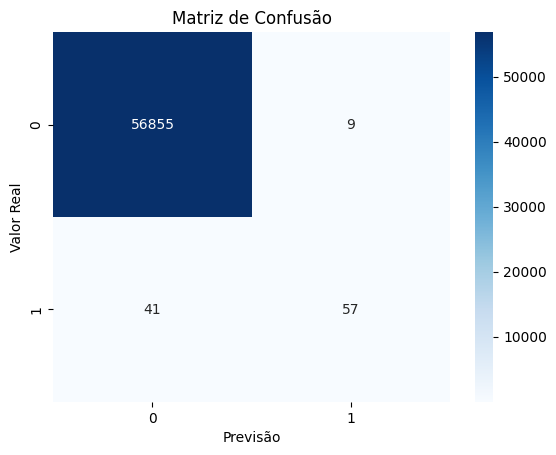

In [28]:
# Visualizando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()


# Insights:

Durante a análise exploratória dos dados, observamos que o conjunto de dados é altamente desbalanceado, com a maioria das transações sendo não fraudulentas. Essa desproporção entre as classes é um desafio comum em problemas de detecção de fraudes e pode afetar o desempenho do modelo.

Após treinar o modelo de Regressão Logística, observamos que ele apresentou uma boa precisão na detecção de fraudes, com uma alta taxa de verdadeiros positivos (transações fraudulentas corretamente identificadas). No entanto, também observamos um número relativamente alto de falsos positivos, ou seja, transações não fraudulentas classificadas como fraudulentas. Isso indica a necessidade de ajustes no modelo ou a exploração de outras técnicas de detecção de fraudes.

# Conclusão:

Neste projeto, abordamos a problemática da detecção de fraudes em transações de cartões de crédito utilizando análise de dados e técnicas de machine learning. Através da exploração dos dados, treinamos um modelo de Regressão Logística e avaliamos seu desempenho na detecção de fraudes.

Embora o modelo tenha alcançado uma boa precisão na identificação de fraudes, observamos a necessidade de lidar com o desbalanceamento das classes e melhorar a taxa de falsos positivos. Isso pode ser alcançado por meio de ajustes no modelo, uso de técnicas de amostragem ou exploração de outros algoritmos de classificação.

A detecção de fraudes em transações de cartões de crédito é um desafio constante, mas a análise de dados e as técnicas de machine learning fornecem ferramentas poderosas para enfrentar esse problema. A contínua evolução dessas técnicas e a colaboração entre instituições financeiras e empresas podem ajudar a proteger as transações e garantir a segurança dos usuários.